In [3]:
#!pip3 install opencv-python

    100% |████████████████████████████████| 52.3MB 932kB/s eta 0:00:01
efficientnet 1.1.1 has requirement keras-applications<=1.0.8,>=1.0.7, but you'll have keras-applications 1.0.4 which is incompatible.
You are using pip version 10.0.0, however version 20.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


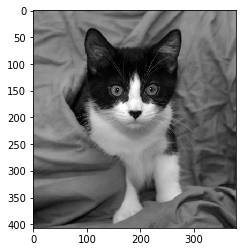

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img_path = '/Users/sattwatikundu/Release2.1-Space/Space_Notebook/cats_and_dogs/training/cat.1002.jpg'# Load color image 
bgr_img = cv2.imread(img_path)# Convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)# Normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255# Plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

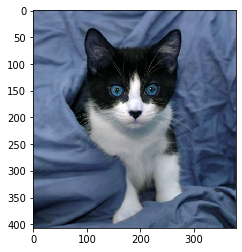

In [31]:
img_path = '/Users/sattwatikundu/Release2.1-Space/Space_Notebook/cats_and_dogs/training/cat.1002.jpg'# Load color image 
bgr_img = cv2.imread(img_path)
plt.imshow(bgr_img)
plt.show()

In [7]:
import numpy as np
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [9]:
# Define four different filters, all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])# Print out the values of filter 1 as an example
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


In [11]:
!pip install torch

    100% |████████████████████████████████| 97.4MB 478kB/s eta 0:00:01
    100% |████████████████████████████████| 829kB 11.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /Users/sattwatikundu/Library/Caches/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
efficientnet 1.1.1 has requirement keras-applications<=1.0.8,>=1.0.7, but you'll have keras-applications 1.0.4 which is incompatible.
You are using pip version 10.0.0, however version 20.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [16]:
# Neural network with one convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # Assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
    
    def forward(self, x):
        # Calculates the output of a convolutional layer pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # Returns both layers
        return conv_x, activated_x

# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)# Print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [17]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

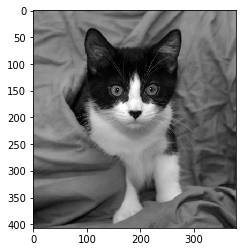

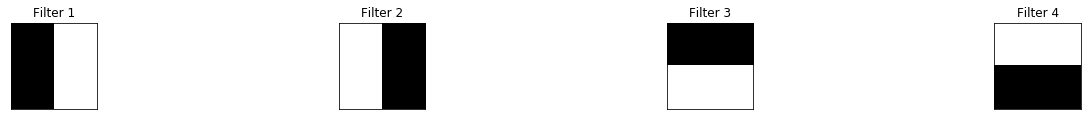

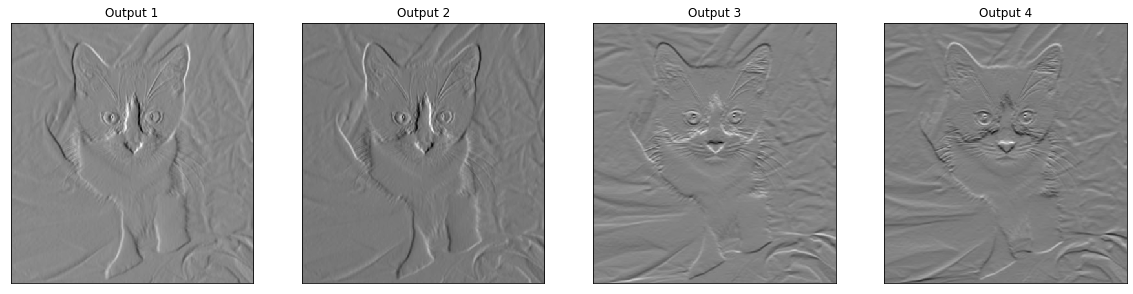

In [18]:
# Plot original image
plt.imshow(gray_img, cmap='gray')# Visualize all of the filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))# Convert the image into an input tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)# Get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)# Visualize the output of a convolutional layer
viz_layer(conv_layer)

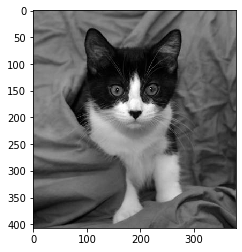

In [26]:
gray = cv2.cvtColor(bgr_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

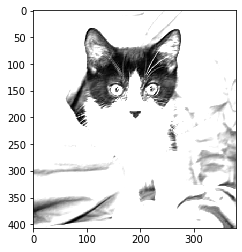

In [44]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
sobel_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
  
filtered_image = cv2.filter2D(gray, -1, sobel_x)
plt.imshow(filtered_image, cmap='gray')

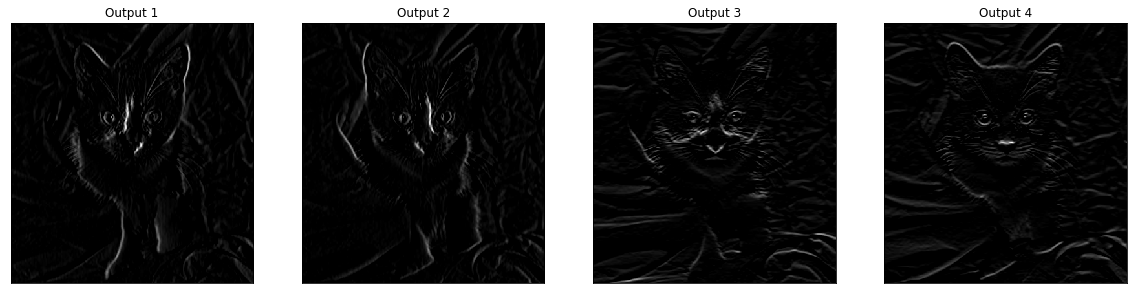

In [28]:
viz_layer(activated_layer)

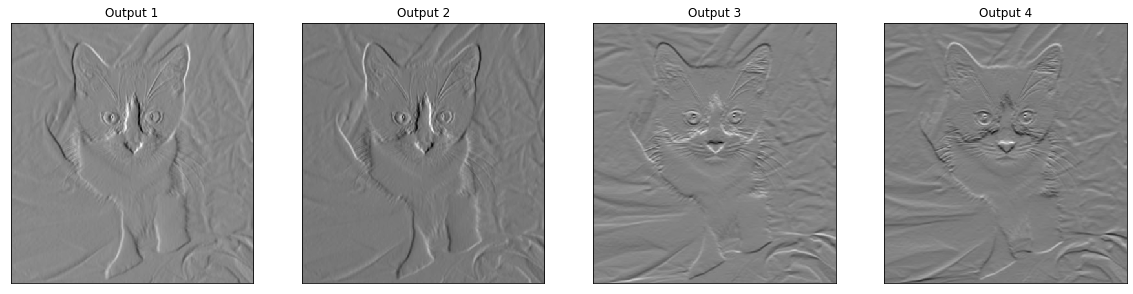

In [32]:
viz_layer(conv_layer)